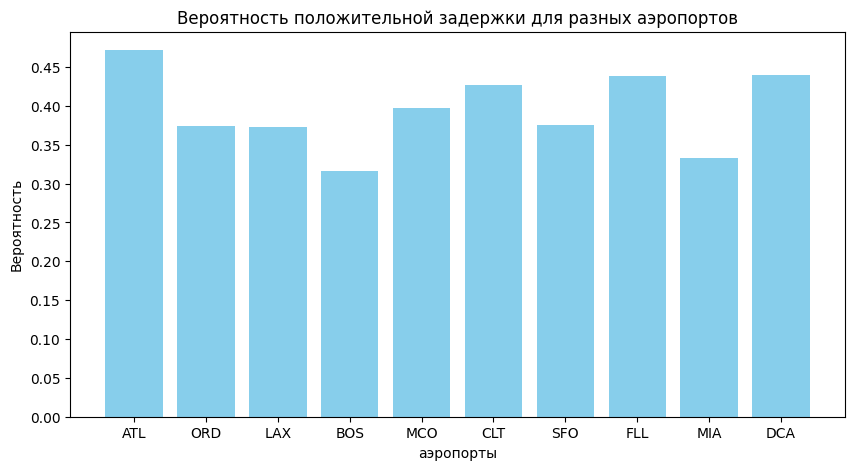

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

# открываем файл
FLIGHTS = pd.read_csv('flights_NY.csv', delimiter=",", encoding='utf-8')  # укажи нужный разделитель
# убираем ячейки нан
FLIGHTS = FLIGHTS.dropna()
# находим значения чаще встречающиеся
top_values = FLIGHTS['dest'].value_counts().head(10).index
FLIGHTS_MOST_POP = FLIGHTS[FLIGHTS['dest'].isin(top_values)]

# считаем вероятность
counts = [len(FLIGHTS_MOST_POP[(FLIGHTS_MOST_POP['dest'] == top_values[i]) & (FLIGHTS_MOST_POP['arr_delay'] > 0)]) for i in range(10)]
all_fl_counts = FLIGHTS_MOST_POP['dest'].value_counts()
probability = [counts[i]/all_fl_counts.iloc[i] for i in range(10)]

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 5))
plt.bar(top_values, probability, color='skyblue')
plt.yticks(np.arange(0, 0.5, 0.05))

# Подписи и заголовок
plt.title('Вероятность положительной задержки для разных аэропортов')
plt.xlabel('аэропорты')
plt.ylabel('Вероятность')

# Показываем график
plt.show()

Во время выполнения задания мы отсортировали таблицу и, воспользовавшись определением вероятности, оценили у какого аэропорта наибольшая
вероятность положительной задержки - ATL, в него же летают чаще всего, наименьшая вероятность у BOS.

Первый предел скорости: 311.21, Второй предел скорости: 380.15


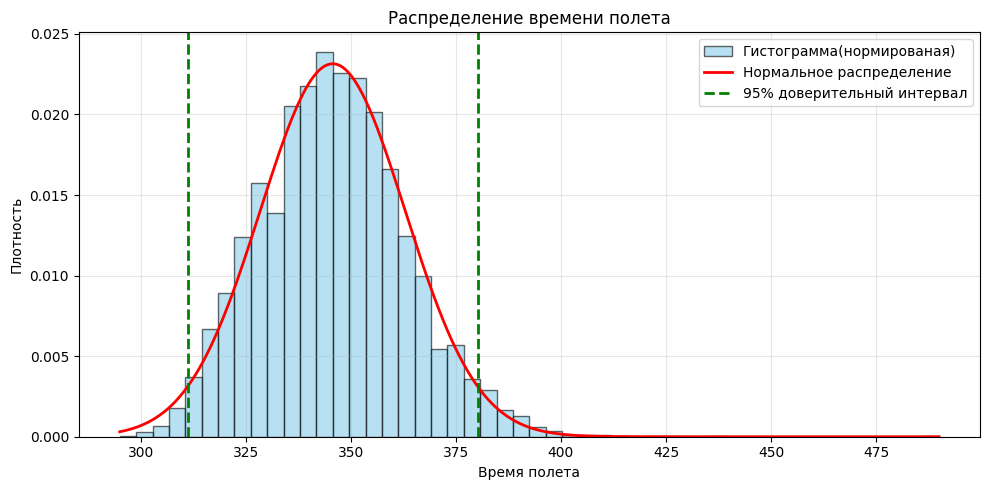

In [2]:
# Выбираем полёты в Сан-Франциско
FLIGHTS_SFO = FLIGHTS[FLIGHTS['dest'] == "SFO"]
air_times = FLIGHTS_SFO['air_time']
# строим гистограмму
plt.figure(figsize=(10, 5))
count, bins, _ = plt.hist(air_times, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Гистограмма(нормированая)')
# найдём параметры нормального распределения
mean  = air_times.mean()
std = air_times.std()

# строим распределение Гауса
x = np.linspace(min(air_times), max(air_times), 1000)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Нормальное распределение')

# строим доверительный интервал в 95% по правилу 2-х сигм
a = mean - 2*std
b = mean + 2*std
# добавляем на график
plt.axvline(a, color='green', linestyle='--', linewidth=2, label='95% доверительный интервал')
plt.axvline(b, color='green', linestyle='--', linewidth=2)
print(f'Первый предел скорости: {a:.2f}, Второй предел скорости: {b:.2f}')
# выводим
plt.title('Распределение времени полета')
plt.xlabel('Время полета')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Мы выбираем табличку рейсов из Нью-Йорка в Сан-Франциско, из неё находим среднее арифметическое и стандартное отклонение времени полёта, 
и по этим данным строим гистограмму и нормальное распределение, которые неплохо сходятся, зелёной чертой на графике показано в каких пределах лежит
время полёта с вероятностью не менее 95% симметрично относительно среднего значения пользуясь правило двух сигм.

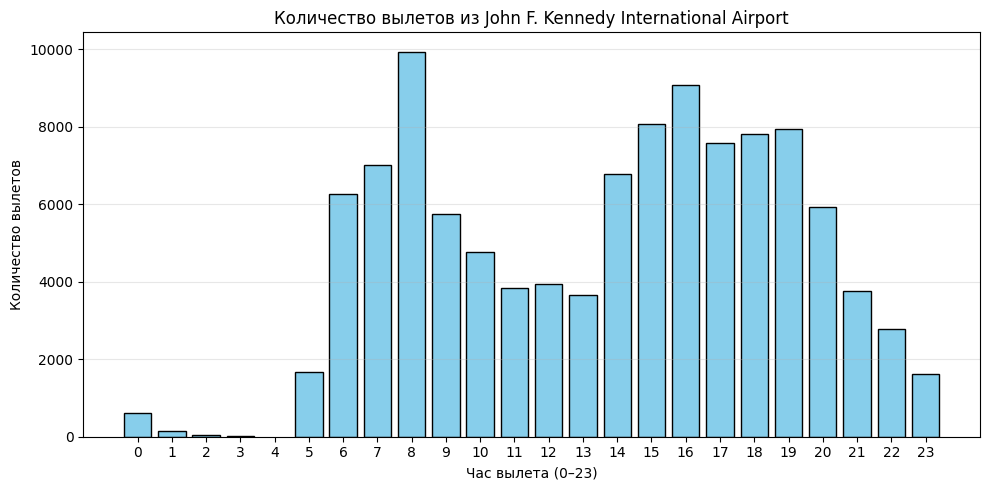

Утренний пик: 8:00
Дневной пик: 16:00
Средняя задержка в 8:00: 1.04 мин
Средняя задержка в 16:00: 10.87 мин
p-value: 0.0000
Различие статистически значимо (p < 0.05)


In [3]:
# таблица полётов из John F. Kennedy International Airport
FLIGHTS_JFK = FLIGHTS[FLIGHTS['origin'] == "JFK"].copy()
# Найдём час вылета просто убрав минуты и переведя время через 24 часа
FLIGHTS_JFK['hour'] = (FLIGHTS_JFK['dep_time'].astype(int))%2400 // 100
# найдём количество вылетов в разные часы
hour_counts = FLIGHTS_JFK['hour'].value_counts()
# сделаем диаграмму
plt.figure(figsize=(10, 5))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue', edgecolor='black')
plt.title('Количество вылетов из John F. Kennedy International Airport')
plt.xlabel('Час вылета (0–23)')
plt.ylabel('Количество вылетов')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Находим пиковые часы
morning_max = hour_counts.loc[hour_counts.index < 12].idxmax()
afternoon_max = hour_counts.loc[hour_counts.index >= 12].idxmax()
print(f'Утренний пик: {morning_max}:00')
print(f'Дневной пик: {afternoon_max}:00')

# Ищем среднюю задержку для каждого пикового часа
morning_delays = FLIGHTS_JFK[FLIGHTS_JFK['hour'] == morning_max]['dep_delay']
afternoon_delays = FLIGHTS_JFK[FLIGHTS_JFK['hour'] == afternoon_max]['dep_delay']

print(f'Средняя задержка в {morning_max}:00: {morning_delays.mean():.2f} мин')
print(f'Средняя задержка в {afternoon_max}:00: {afternoon_delays.mean():.2f} мин')

# Проверка статистической значимости (t-test) библиотеки скипи
t_stat, p_value = ttest_ind(morning_delays, afternoon_delays, equal_var=False)

print(f'p-value: {p_value:.4f}')
# проверка вероятности статистической значимости
if p_value < 0.05:
    print("Различие статистически значимо (p < 0.05)")
else:
    print("Различие не статистически значимо (p ≥ 0.05)")


Копируем таблицу с полётами из John F. Kennedy International Airport, чтобы найти часы берем сотни по модулю 24-ёх, строим гистограмму и находим
самые загруженные часы до и после полудня. Средняя задержка больше в пиковый час после полудня и согласно t-test, статистически значимо.

Сначала делаем группы стандартного отклонения и среднего значения расстояния для каждого аэропорта, составляем из них таблицу,
убираем NaN. Строим простую линейную регрессию, а так же с велечинами квадрата и куба расстояния, с помощью коэфициента детерминации выясняем,
что вторя линейная регрессия точнее.

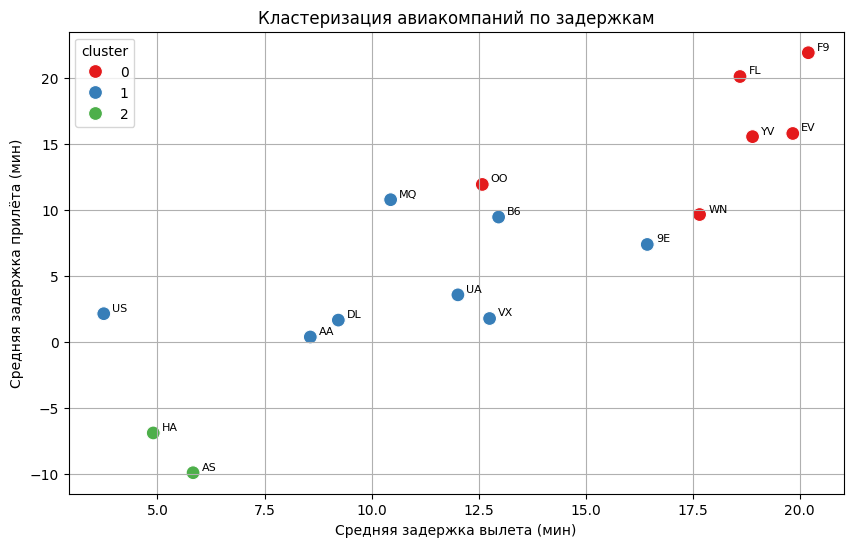

In [4]:
from sklearn.cluster import KMeans
import seaborn as sns

# 1. Группируем по авиакомпании и считаем средние задержки
carrier_delays = FLIGHTS.groupby('carrier')[['dep_delay', 'arr_delay']].mean().reset_index()

# 2. Применяем KMeans для кластеризации
X = carrier_delays[['dep_delay', 'arr_delay']]
kmeans = KMeans(n_clusters=3, random_state=42)
carrier_delays['cluster'] = kmeans.fit_predict(X)


# 4. Построим диаграмму
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=carrier_delays,
    x='dep_delay',
    y='arr_delay',
    hue='cluster',
    palette='Set1',
    s= 100
)
for i, row in carrier_delays.iterrows():
    plt.text(row['dep_delay'] + 0.2, row['arr_delay'] + 0.2, row['carrier'], fontsize=8)

plt.title('Кластеризация авиакомпаний по задержкам')
plt.xlabel('Средняя задержка вылета (мин)')
plt.ylabel('Средняя задержка прилёта (мин)')
plt.grid(True)
plt.show()

Сначала находим средние задержки для авиакомпаний и делим из на кластеры методом Kmeans, строим точечную диаграмму которая показывает расположение кластеров. Красный кластер 0 - компании с самыми большими задержками, кластер синий 1 - нестабильных компаний, но с меньшими задержками и зелёный кластер 2 - с наиболее пунктуаль